In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
import os 
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [264]:
pdData.shape

(100, 3)

Text(0, 0.5, 'Exam 2 Score')

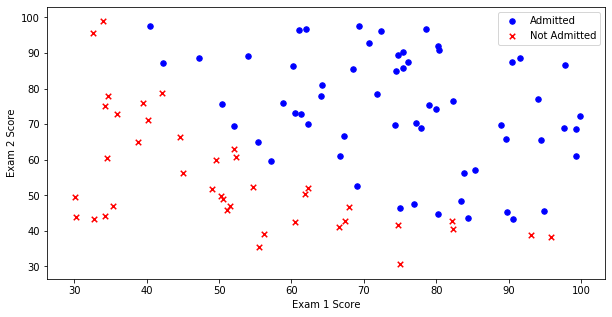

In [265]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [266]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

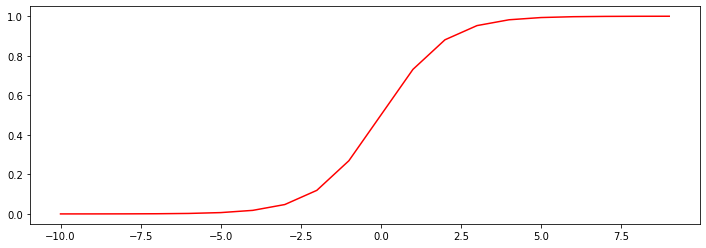

In [267]:
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')

In [268]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [269]:
pdData.insert(0, 'Ones', 1)
type(pdData)

orig_data = pdData.values
cols = orig_data.shape[1]
X = orig_data[:, 0:cols-1]
y = orig_data[:, cols-1:cols]

theta = np.zeros([1, 3])

In [270]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [271]:
X[:5]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [272]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [273]:
cost(X, y, theta)

0.6931471805599453

In [274]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error =(model(X, theta) - y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)
        
    return grad

In [275]:
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2

def stopCriterion(type, value, threshold):
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST: 
        return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold

In [276]:
import numpy.random

def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y

In [277]:
import time

def descent(data, theta, batchSize, stopType, thresh, alpha):
    init_time = time.time()
    i = 0
    k = 0
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape)
    costs = [cost(X, y, theta)]
    
    while True:
        grad = gradient(X[k: k+batchSize], y[k: k+batchSize], theta)
        k += batchSize
        if k >= n:
            k = 0
            X, y = shuffleData(data)
        theta = theta - alpha*grad
        costs.append(cost(X, y ,theta))
        i += 1
        
        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh):
            break

    return theta, i-1, costs, grad, time.time()

In [278]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1570138122.48s


array([[-0.00027127,  0.00705232,  0.00376711]])

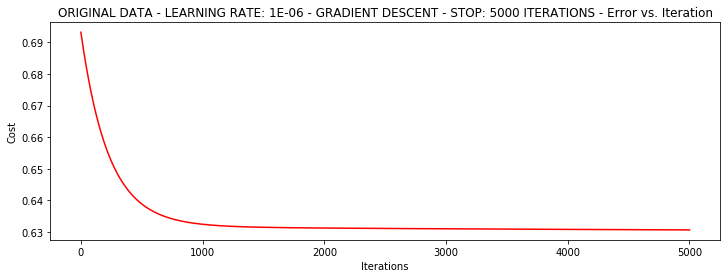

In [281]:
n=100
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 1570138151.13s


array([[-5.13364014,  0.04771429,  0.04072397]])

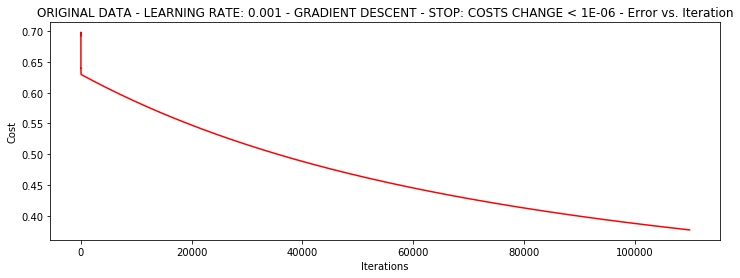

In [282]:
runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001, alpha=0.001)

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 1570138160.94s


array([[-2.37033409,  0.02721692,  0.01899456]])

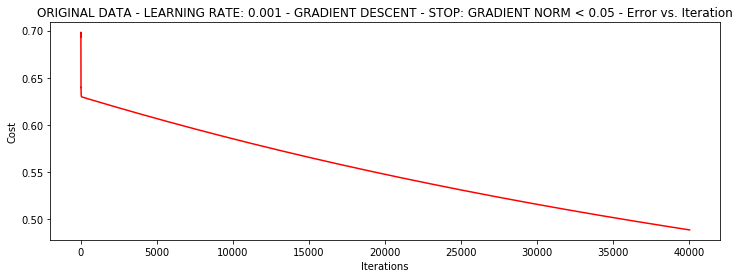

In [283]:
runExpe(orig_data, theta, n, STOP_GRAD, thresh=0.05, alpha=0.001)

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.38247036  0.01431526  0.05290881]] - Iter: 5000 - Last cost: 1.33 - Duration: 1570138173.90s


array([[-0.38247036,  0.01431526,  0.05290881]])

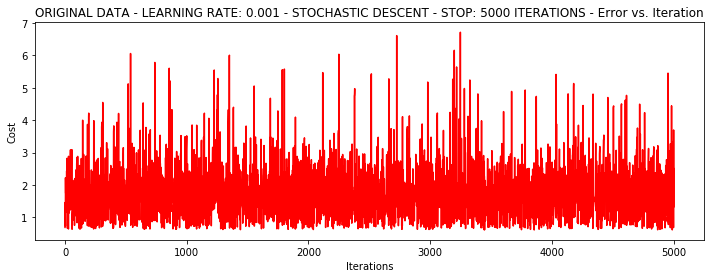

In [284]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202487  0.00979218  0.00068388]] - Iter: 15000 - Last cost: 0.63 - Duration: 1570138258.77s


array([[-0.00202487,  0.00979218,  0.00068388]])

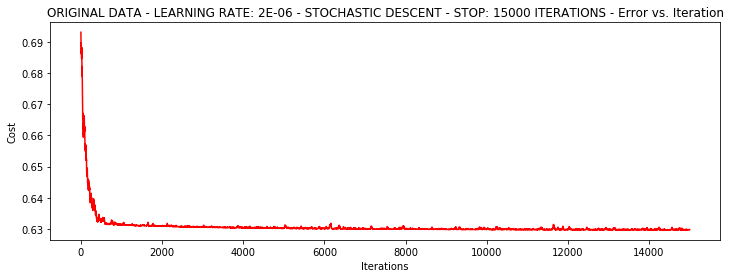

In [285]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.03541041  0.04447979  0.01555029]] - Iter: 15000 - Last cost: 0.93 - Duration: 1570138269.79s


array([[-1.03541041,  0.04447979,  0.01555029]])

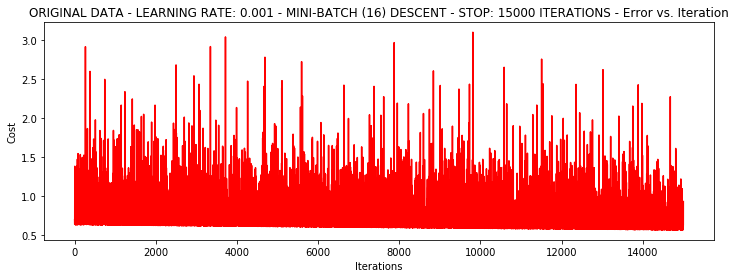

In [286]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)